In [1]:
import numpy as np
from tensorflow import keras
import cv2

# Initialized the model

In [2]:
model = keras.models.load_model('new_model.h5')


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline 

# add sudoku image to be solved by model

In [4]:
image = cv2.imread("sudoku.png", cv2.IMREAD_GRAYSCALE)

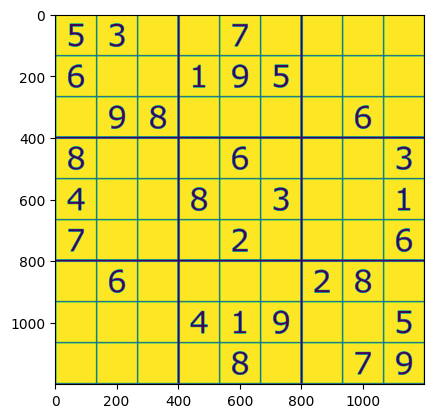

In [5]:
plt.imshow(image)

#  Resized the image of sudoku grid according to size of MNIST dataset & divided it into smaller grids of a cell 


In [6]:
# Preprocess the image
image = cv2.GaussianBlur(image, (9, 9), 0)
_, threshold = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

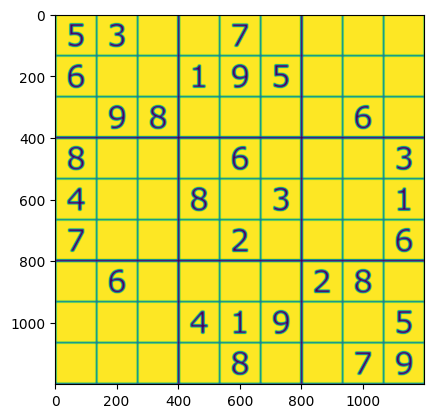

In [7]:
plt.imshow(image)

In [8]:
# Find contours in the thresholded image
contours, _ = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Define the cell dimensions
cell_width = image.shape[1] // 9
cell_height = image.shape[0] // 9

In [9]:
# Extract each cell and predict its digit
cells = []
for row in range(9):
    cells_row = []
    for col in range(9):
        # Extract the cell
        x = col * cell_width
        y = row * cell_height
        cell = threshold[y:y+cell_height, x:x+cell_width]
        cells_row.append(cell)
    cells.append(cells_row)

        

In [10]:
grid=[]
predictions=[]
for row in cells:
    grid_row=[]
    for cell in row:
        # Check if the cell is empty
            # Resize the cell to match the input size of the model
        resized_cell = cv2.resize(cell, (28, 28), interpolation=cv2.INTER_AREA)

            # Preprocess the cell and normalize pixel values
        preprocessed_cell = resized_cell.reshape((1, 28, 28, 1)) / 255.0

            # Predict the digit using the trained model
        prediction = model.predict(preprocessed_cell)
        probability=np.amax(prediction)
        if(probability>0.4):
            digit=np.argmax(prediction)
        else:
            digit=0

        # Append the digit to the grid
        predictions.append(prediction)
        grid_row.append(digit)

    grid.append(grid_row)
        



1/1 [==============================] - 0s 24ms/step


In [11]:
# Print the Sudoku grid
for row in grid:
    for digit in row:
        print(digit, end=" ")
    print()


5 3 0 0 7 0 0 0 0 
6 0 0 1 9 5 0 0 0 
0 9 8 0 0 0 0 6 0 
8 0 0 0 6 0 0 0 3 
4 0 0 8 0 3 0 0 1 
7 0 0 0 2 0 0 0 6 
0 6 0 0 0 0 2 8 0 
0 0 0 4 1 9 0 0 5 
0 0 0 0 8 0 0 7 9 


In [12]:
print(predictions[9])

print("mean",np.mean(predictions[9]))
print("sd:",np.std(predictions[9]))


[[1.1226820e-03 3.5864058e-13 5.1724569e-10 3.4503639e-08 4.0750493e-11
  1.2634299e-03 9.9758852e-01 5.7661404e-15 2.4060229e-05 1.2463743e-06]]
mean 0.1
sd: 0.29919654


In [13]:
print(predictions[31])

print("mean",np.mean(predictions[31]))
print("sd:",np.std(predictions[31]))

[[5.2032568e-03 5.2918265e-13 2.6277713e-09 1.0362184e-07 7.6771922e-11
  3.7508474e-03 9.9098665e-01 3.9364067e-14 5.6844758e-05 2.3897617e-06]]
mean 0.10000001
sd: 0.29700094


In [14]:
sum1=1.7326048e-10 + 3.6447484e-11+3.5618857e-08+ 9.9999988e-01+1.7732794e-14+1.1089485e-08+ 1.2475335e-15+ 2.5224329e-08+1.3767558e-09+6.6048592e-08
avg1=sum1/10
print("avg1:",avg1)
print("mean",np.mean(predictions[1]))
print("sd:",np.std(predictions[1]))


avg1: 0.10000000195677457
mean 0.099999994
sd: 0.2999978


In [15]:
predictions[1]

array([[9.59716203e-07, 1.04792242e-07, 8.17438831e-07, 9.99993443e-01,
        1.22707695e-11, 6.82342773e-07, 1.40486641e-11, 5.39935812e-08,
        1.71990109e-06, 2.16041803e-06]], dtype=float32)

In [16]:
predictions[2].sum()

1.0

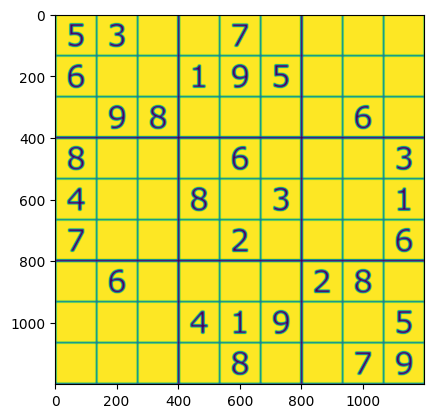

In [17]:
plt.imshow(image)

In [18]:
p=predictions[0]
print(p)

print("mean",np.mean(p))
print("sd:",np.std(p))

[[1.81802696e-14 2.40243632e-12 3.04830624e-14 1.25618858e-08
  1.00983736e-13 9.99999762e-01 9.11092122e-12 3.73904900e-13
  5.86494603e-11 1.95956375e-07]]
mean 0.099999994
sd: 0.2999999


In [19]:
# Print the Sudoku grid
for row in grid:
    for digit in row:
        print(digit, end=" ")
    print()


5 3 0 0 7 0 0 0 0 
6 0 0 1 9 5 0 0 0 
0 9 8 0 0 0 0 6 0 
8 0 0 0 6 0 0 0 3 
4 0 0 8 0 3 0 0 1 
7 0 0 0 2 0 0 0 6 
0 6 0 0 0 0 2 8 0 
0 0 0 4 1 9 0 0 5 
0 0 0 0 8 0 0 7 9 


In [20]:
sudoku=grid
sudoku

[[5, 3, 0, 0, 7, 0, 0, 0, 0],
 [6, 0, 0, 1, 9, 5, 0, 0, 0],
 [0, 9, 8, 0, 0, 0, 0, 6, 0],
 [8, 0, 0, 0, 6, 0, 0, 0, 3],
 [4, 0, 0, 8, 0, 3, 0, 0, 1],
 [7, 0, 0, 0, 2, 0, 0, 0, 6],
 [0, 6, 0, 0, 0, 0, 2, 8, 0],
 [0, 0, 0, 4, 1, 9, 0, 0, 5],
 [0, 0, 0, 0, 8, 0, 0, 7, 9]]

#   Resized the image of sudoku grid according to size of MNIST dataset & divided it into smaller grids of a cell 


# Backtracking to solve sudoku

In [21]:
def solve_sudoku(board):
    if not find_empty_cell(board):
        return True

    row, col = find_empty_cell(board)
    for num in range(1, 10):
        if is_valid_move(board, row, col, num):
            board[row][col] = num

            if solve_sudoku(board):
                return True

            board[row][col] = 0

    return False

def find_empty_cell(board):
    for i in range(9):
        for j in range(9):
            if board[i][j] == 0:
                return i, j
    return None

def is_valid_move(board, row, col, num):
    # Check if num already exists in the same row
    for i in range(9):
        if board[row][i] == num:
            return False

    # Check if num already exists in the same column
    for i in range(9):
        if board[i][col] == num:
            return False

    # Check if num already exists in the same 3x3 grid
    start_row = (row // 3) * 3
    start_col = (col // 3) * 3
    for i in range(3):
        for j in range(3):
            if board[start_row + i][start_col + j] == num:
                return False

    return True


if solve_sudoku(sudoku):
    print("Sudoku solved successfully!")
    for row in sudoku:
        print(row)
else:
    print("No solution exists for the given Sudoku board.")


Sudoku solved successfully!
[5, 3, 4, 6, 7, 8, 9, 1, 2]
[6, 7, 2, 1, 9, 5, 3, 4, 8]
[1, 9, 8, 3, 4, 2, 5, 6, 7]
[8, 5, 9, 7, 6, 1, 4, 2, 3]
[4, 2, 6, 8, 5, 3, 7, 9, 1]
[7, 1, 3, 9, 2, 4, 8, 5, 6]
[9, 6, 1, 5, 3, 7, 2, 8, 4]
[2, 8, 7, 4, 1, 9, 6, 3, 5]
[3, 4, 5, 2, 8, 6, 1, 7, 9]


# soduku solved